In [1]:
import pandas as pd

# Define the Excel file name
excel_file_name = 'Online Retail.xlsx'

# Read the Excel file
df = pd.read_excel(excel_file_name)

# Define the CSV file name
csv_file_name = 'Online Retail.csv'

# Write the dataframe to a CSV file
df.to_csv(csv_file_name, index=False)

Total Revenue: 8278519.4240000015
Average Order Value: 373.07433186120386


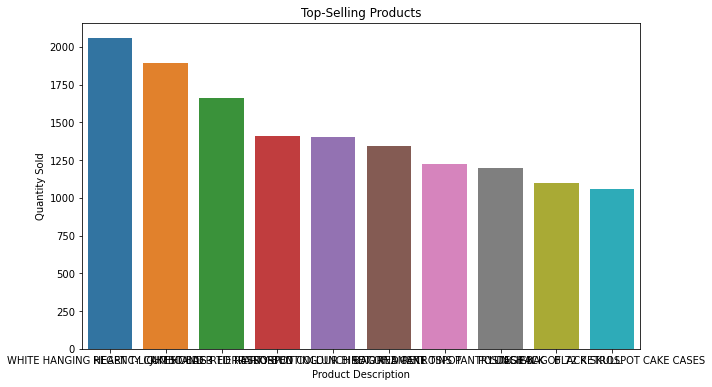

"Steps in EDA
1.Data Cleaning: Handling missing values, removing duplicates, and data normalization.
2.Data Visualization: Using plots and charts to visualize the distribution of variables, relationships between variables, and trends in the data.
3.Summary Statistics: Calculating summary statistics such as mean, median, mode, and standard deviation to understand the central tendency and variability of the data.
Techniques Used in EDA
1.Histograms: Visualizing the distribution of a single variable.
2.Bar Charts: Comparing the values of different categories.
3.Line Charts: Visualizing trends over time.
4.Scatter Plots: Visualizing relationships between two variables


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Calculate total revenue
df['Revenue'] = df['Quantity'] * df['UnitPrice']
total_revenue = df['Revenue'].sum()
print(f'Total Revenue: {total_revenue}')

# Calculate average order value
avg_order_value = df.groupby('InvoiceNo')['Revenue'].sum().mean()
print(f'Average Order Value: {avg_order_value}')

# Visualize top-selling products
top_products = df['Description'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top-Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Quantity Sold')
plt.show()
summary=""""Steps in EDA
1.Data Cleaning: Handling missing values, removing duplicates, and data normalization.
2.Data Visualization: Using plots and charts to visualize the distribution of variables, relationships between variables, and trends in the data.
3.Summary Statistics: Calculating summary statistics such as mean, median, mode, and standard deviation to understand the central tendency and variability of the data."""

summary2='''Techniques Used in EDA
1.Histograms: Visualizing the distribution of a single variable.
2.Bar Charts: Comparing the values of different categories.
3.Line Charts: Visualizing trends over time.
4.Scatter Plots: Visualizing relationships between two variables'''
print (summary)
print(summary2)

In [25]:
# Calculate customer metrics
customer_metrics = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'Revenue': 'sum',
    'InvoiceDate': 'max'
})
customer_metrics.columns = ['OrderCount', 'TotalRevenue', 'LastOrderDate']

# Calculate recency
customer_metrics['Recency'] = (customer_metrics['LastOrderDate'].max() - customer_metrics['LastOrderDate']).dt.days

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_metrics_scaled = scaler.fit_transform(customer_metrics[['OrderCount', 'TotalRevenue', 'Recency']])

# Perform K-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
customer_metrics['Cluster'] = kmeans.fit_predict(customer_metrics_scaled)

string="""How K-Means Clustering Works
1.Data Preparation: The first step is to prepare the data for clustering. This involves selecting the relevant features (e.g., order count, total revenue, recency) and scaling the data to ensure that all features are on the same scale.
2.Choosing the Number of Clusters: The next step is to choose the number of clusters (k) that you want to segment your customers.This can be done using various methods, such as the elbow method or silhouette analysis.
3.Clustering: Once the number of clusters is chosen, the K-means algorithm assigns each customer to a cluster based on their features. The algorithm iteratively updates the cluster centroids and reassigns customers to clusters until convergence.
4.Cluster Analysis: After clustering, you can analyze the characteristics of each cluster, such as the average order count, total revenue, and recency."""
print(string)
df.head(100)


How K-Means Clustering Works
1.Data Preparation: The first step is to prepare the data for clustering. This involves selecting the relevant features (e.g., order count, total revenue, recency) and scaling the data to ensure that all features are on the same scale.
2.Choosing the Number of Clusters: The next step is to choose the number of clusters (k) that you want to segment your customers.This can be done using various methods, such as the elbow method or silhouette analysis.
3.Clustering: Once the number of clusters is chosen, the K-means algorithm assigns each customer to a cluster based on their features. The algorithm iteratively updates the cluster centroids and reassigns customers to clusters until convergence.
4.Cluster Analysis: After clustering, you can analyze the characteristics of each cluster, such as the average order count, total revenue, and recency.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
95,536378,22352,LUNCH BOX WITH CUTLERY RETROSPOT,6,2010-12-01 09:37:00,2.55,14688.0,United Kingdom,15.30
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688.0,United Kingdom,50.40
97,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom,13.20
98,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom,13.20


In [6]:
# Analyze cluster characteristics
cluster_characteristics = customer_metrics.groupby('Cluster').agg({
    'OrderCount': 'mean',
    'TotalRevenue': 'mean',
    'Recency': 'mean'
})
print(cluster_characteristics)

# Provide recommendations
print('Recommendations:')
print('1. Target high-value customers (Cluster 2) with loyalty programs and personalized marketing.')
print('2. Encourage customers in Cluster 1 to make repeat purchases through email marketing and promotions.')
print('3. Reactivate inactive customers (Cluster 0) with win-back campaigns and special offers.')

         OrderCount  TotalRevenue     Recency
Cluster                                      
0          5.597531   1817.017066   38.963580
1          1.853922    458.796710  244.994590
2         86.869565  81851.242609    5.086957
Recommendations:
1. Target high-value customers (Cluster 2) with loyalty programs and personalized marketing.
2. Encourage customers in Cluster 1 to make repeat purchases through email marketing and promotions.
3. Reactivate inactive customers (Cluster 0) with win-back campaigns and special offers.


Analysing Customers Purchasing Behavior
Total Revenue: 8278519.4240000015
Average Order Value: 373.07433186120386


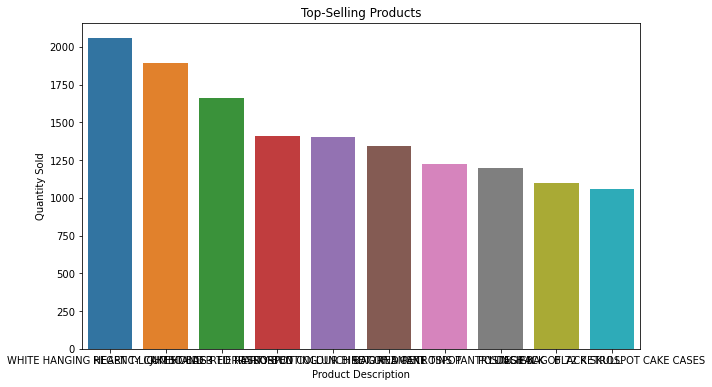

         OrderCount  TotalRevenue     Recency
Cluster                                      
0          5.598950   1817.559306   38.933930
1          1.853153    458.438064  244.895495
2         86.869565  81851.242609    5.086957
Recommendations:
1. Target high-value customers (Cluster 2) with loyalty programs and personalized marketing.
2. Encourage customers in Cluster 1 to make repeat purchases through email marketing and promotions.
3. Reactivate inactive customers (Cluster 0) with win-back campaigns and special offers.


In [33]:
str="Analysing Customers Purchasing Behavior"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Define the Excel file name
excel_file_name = 'Online Retail.xlsx'

# Read the Excel file
df = pd.read_excel(excel_file_name)

# Define the CSV file name
csv_file_name = 'Online Retail.csv'

# Write the dataframe to a CSV file
df.to_csv(csv_file_name, index=False)

# Load the dataset
df = pd.read_csv('Online Retail.csv')

# Handle missing values
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert date column to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print(str)

# Calculate total revenue
df['Revenue'] = df['Quantity'] * df['UnitPrice']
total_revenue = df['Revenue'].sum()
print(f'Total Revenue: {total_revenue}')

# Calculate average order value
avg_order_value = df.groupby('InvoiceNo')['Revenue'].sum().mean()
print(f'Average Order Value: {avg_order_value}')

# Visualize top-selling products
top_products = df['Description'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top-Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Quantity Sold')
plt.show()

# Calculate customer metrics
customer_metrics = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'Revenue': 'sum',
    'InvoiceDate': 'max'
})
customer_metrics.columns = ['OrderCount', 'TotalRevenue', 'LastOrderDate']

# Calculate recency
max_date = customer_metrics['LastOrderDate'].max()
customer_metrics['Recency'] = (max_date - customer_metrics['LastOrderDate']).dt.days

# Scale the data
scaler = StandardScaler()
customer_metrics_scaled = scaler.fit_transform(customer_metrics[['OrderCount', 'TotalRevenue', 'Recency']])

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)
customer_metrics['Cluster'] = kmeans.fit_predict(customer_metrics_scaled)

# Analyze cluster characteristics
cluster_characteristics = customer_metrics.groupby('Cluster').agg({
    'OrderCount': 'mean',
    'TotalRevenue': 'mean',
    'Recency': 'mean'
})
print(cluster_characteristics)

# Provide recommendations
print('Recommendations:')
print('1. Target high-value customers (Cluster 2) with loyalty programs and personalized marketing.')
print('2. Encourage customers in Cluster 1 to make repeat purchases through email marketing and promotions.')
print('3. Reactivate inactive customers (Cluster 0) with win-back campaigns and special offers.')
